In [9]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy.io import loadmat
import pdb

In [10]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels

In [13]:
def perceptron_train(X,Y,Xtest,Ytest,iterations=100,eta=.1):
    # initialize accuracy vector
    acc = np.zeros(iterations)
    # initialize weight vector
    weights = np.zeros(X.shape[0])
    
    # loop over iterations    
    for it in np.arange(iterations):
        # indices of misclassified data
        predictions = np.sign(np.dot(weights.T, X))
        wrong = np.where(predictions != Y)[0]
        # check if there is misclassified data
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            rit = np.random.choice(wrong)
            # update weight vector
            weights += eta * Y[rit] * X[:, rit]
        
        test_predictions = np.sign(np.dot(weights.T, Xtest))
        # compute error
        acc[it] = np.mean(test_predictions == Ytest)

    # return weight vector and error
    return weights,acc

C:\Users\ALARAN ADEDAMOLA\AppData\Local\Temp\ipykernel_5048\1934367482.py:6: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  labels = sp.sign((labels[digit,:]>0)-.5)
C:\Users\ALARAN ADEDAMOLA\AppData\Local\Temp\ipykernel_5048\1934367482.py:9: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  permidx = np.random.permutation(sp.arange(imgs.shape[-1]))
C:\Users\ALARAN ADEDAMOLA\AppData\Local\Temp\ipykernel_5048\1934367482.py:11: DeprecationWarning: scipy.floor is deprecated and will be removed in SciPy 2.0.0, use numpy.floor instead
  stopat = sp.floor(labels.shape[-1]*trainpercent/100.)
C:\Users\ALARAN ADEDAMOLA\AppData\Local\Temp\ipykernel_5048\1934367482.py:35: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  weights = np.reshape(w,(int(sp.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape[0]))))


(256, 1404) (1404,) (256, 603) (603,)


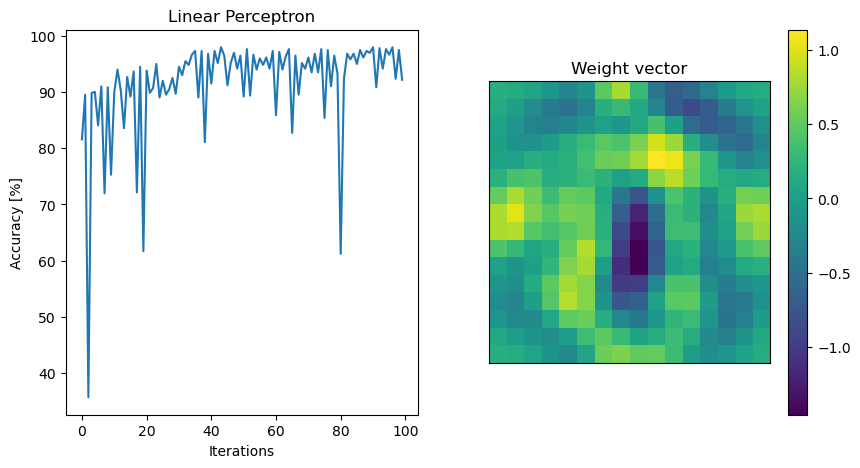

In [15]:
digit = 0
fname = "usps.mat"

imgs,labels = load_data(fname)
# we only want to classify one digit 
labels = sp.sign((labels[digit,:]>0)-.5)

# please think about what the next lines do
permidx = np.random.permutation(sp.arange(imgs.shape[-1]))
trainpercent = 70.
stopat = sp.floor(labels.shape[-1]*trainpercent/100.)
stopat= int(stopat)

# cut segment data into train and test set into two non-overlapping sets:
X = imgs[:, permidx[:stopat]]
Y = labels[permidx[:stopat]]
Xtest = imgs[:, permidx[stopat:]]
Ytest = labels[permidx[stopat:]]
#check that shapes of X and Y make sense..
# it might makes sense to print them
print(X.shape, Y.shape, Xtest.shape, Ytest.shape)

w,acc_perceptron = perceptron_train(X,Y,Xtest,Ytest)

fig = pl.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(acc_perceptron*100.)
pl.xlabel('Iterations')
pl.title('Linear Perceptron')
pl.ylabel('Accuracy [%]')

# and imshow the weight vector
ax2 = fig.add_subplot(1,2,2)
# reshape weight vector
weights = np.reshape(w,(int(sp.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape[0]))))
# plot the weight image
imgh = ax2.imshow(weights)
# with colorbar
pl.colorbar(imgh)
ax2.set_title('Weight vector')
# remove axis ticks
pl.xticks(())
pl.yticks(())
# remove axis ticks
pl.xticks(())
pl.yticks(())

# write the picture to pdf
fname = 'Perceptron_digits-%d.pdf'%digit
pl.savefig(fname)

